# Desafio 2
José Quezada  
Jorge Sanhueza

In [61]:
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [76]:
np.random.seed(100)
n = 200

# parámetros
sigma1 = 0.13
sigma2 = 0.17
sigma3 = 0.28
sigma4 = 0.3
sigma5 = 0.42

mu1 = 1
mu2 = 1.5
mu3 = 1.05
mu4 = 1.1
mu5 = 0.9

# eje x
xdata = np.arange(n)

# random sets
rand1 = np.random.randn(n)
rand2 = np.random.randn(n)
rand3 = np.random.randn(n)
rand4 = np.random.randn(n)
rand5 = np.random.randn(n)

# canales de ruido
ch1 = sigma1 * rand1 + mu1
ch2 = sigma2 * rand2 + mu2
ch3 = sigma3 * rand3 + mu3
ch4 = sigma4 * rand4 + mu4
ch5 = sigma5 * rand5 + mu5

## Visualización de ruido

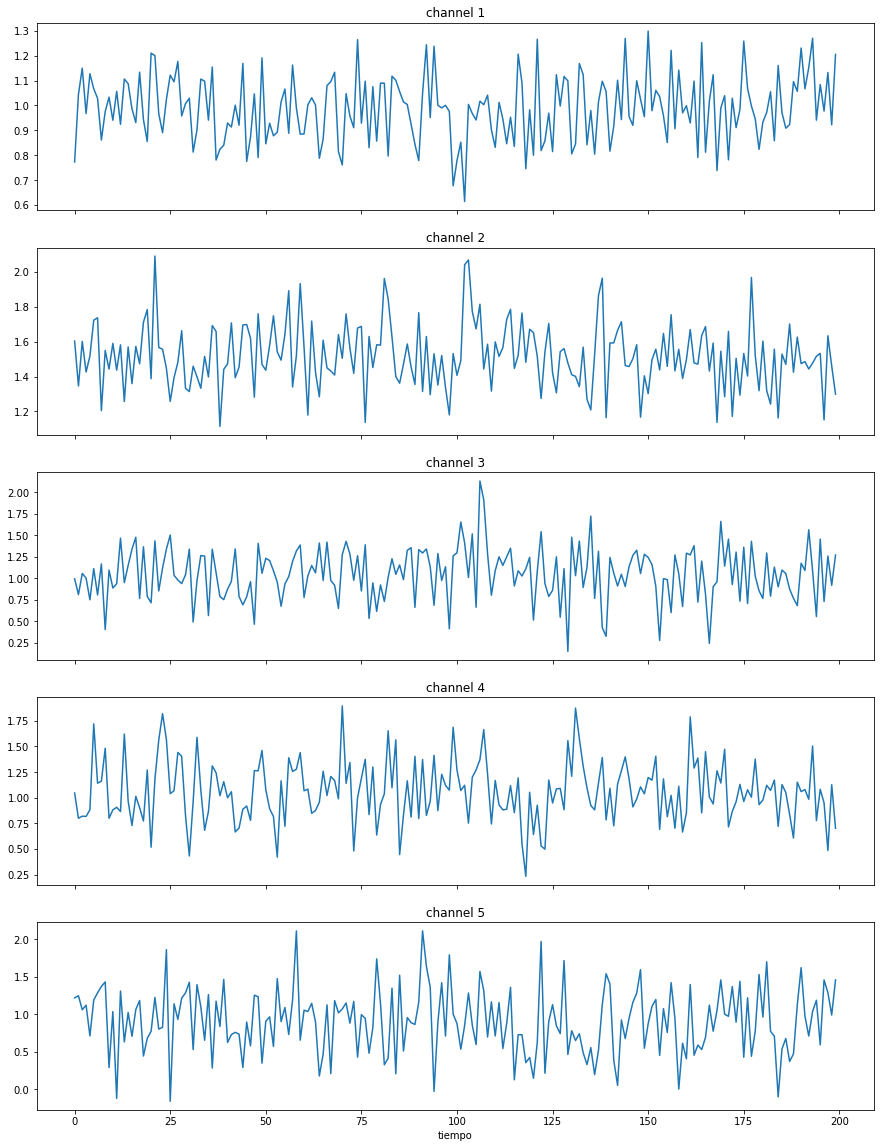

In [77]:
fig, ax = plt.subplots(5, figsize=(15,20), sharex=True,)
# plt.setp(ax, ylim=(-0.5,2.5))
ax[4].set(xlabel="tiempo")

ax[0].set_title('channel 1')
ax[0].plot(xdata,ch1)
ax[1].set_title('channel 2')
ax[1].plot(xdata,ch2)
ax[2].set_title('channel 3')
ax[2].plot(xdata,ch3)
ax[3].set_title('channel 4')
ax[3].plot(xdata,ch4)
ax[4].set_title('channel 5')
ax[4].plot(xdata,ch5)
plt.show()


## Matriz de dispersión

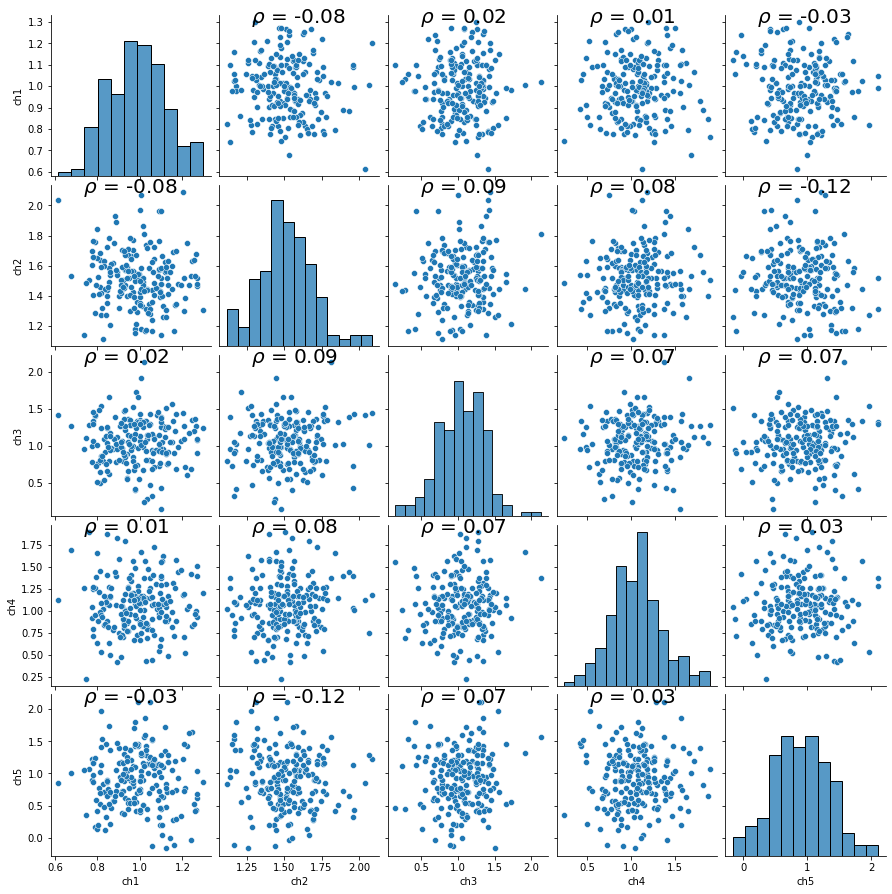

In [78]:
A=np.empty(shape=(n,5))
A[:,0]=ch1
A[:,1]=ch2
A[:,2]=ch3
A[:,3]=ch4
A[:,4]=ch5
df= pd.DataFrame(A,columns=["ch1","ch2","ch3", "ch4", "ch5"])

def corr(x, y, **kwargs):

    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))

    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)

grid = sb.pairplot(df,)
grid = grid.map_upper(corr)
grid = grid.map_lower(corr)